In [50]:
import sys
sys.path.append('../../')

%run '../../src/data/data_collection.py'

/Users/dumindu/anaconda3/envs/conda-diabetes/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

In [37]:
data.isna().sum().sort_values(ascending=False)

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
tolazamide                      0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
citoglipton                     0
examide                         0
acetohexamide                   0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
glipizide                       0
nateglinide                     0
glimepiride                     0
chlorpropamide

In [38]:
dtypes = data.dtypes

dtypes[dtypes == 'int64']

admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
dtype: object

In [39]:
data.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

<Axes: >

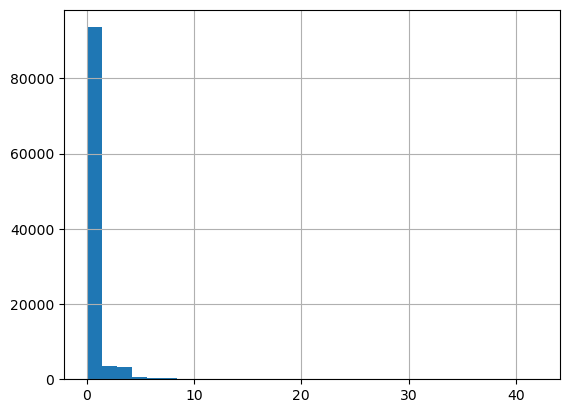

In [41]:
import matplotlib.pyplot as plt
data['number_outpatient'].hist(bins=30)

(array([1.6320e+03, 6.1330e+03, 7.8370e+03, 1.6054e+04, 1.7797e+04,
        1.1222e+04, 1.3520e+04, 9.7890e+03, 4.5350e+03, 4.9280e+03,
        3.0820e+03, 1.3350e+03, 1.3450e+03, 8.0800e+02, 3.8800e+02,
        4.0100e+02, 2.8000e+02, 1.3400e+02, 1.5900e+02, 1.2700e+02,
        6.9000e+01, 7.1000e+01, 5.2000e+01, 2.2000e+01, 2.4000e+01,
        1.4000e+01, 3.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 1.        ,  3.66666667,  6.33333333,  9.        , 11.66666667,
        14.33333333, 17.        , 19.66666667, 22.33333333, 25.        ,
        27.66666667, 30.33333333, 33.        , 35.66666667, 38.33333333,
        41.        , 43.66666667, 46.33333333, 49.        , 51.66666667,
        54.33333333, 57.        , 59.66666667, 62.33333333, 65.        ,
        67.66666667, 70.33333333, 73.        , 75.66666667, 78.33333333,
        81.        ]),
 <BarContainer object of 30 artists>)

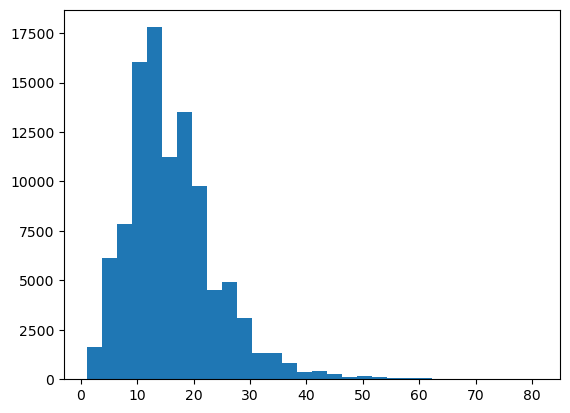

In [46]:
plt.hist(data['num_medications'], bins=30)

In [56]:
%run '../../src/data/data_preprocessing.py'

/Users/dumindu/anaconda3/envs/conda-diabetes/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [57]:
print(data.iloc[:, 10].dtypes)

float64


In [55]:
data.iloc[:, 10]

0         41.0
1         59.0
2         11.0
3         44.0
4         51.0
          ... 
101761    51.0
101762    33.0
101763    53.0
101764    45.0
101765    13.0
Name: num_lab_procedures, Length: 101766, dtype: float64

In [27]:
data.select_dtypes(include=['object']).columns

Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [47]:
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
data.columns.difference(numeric_cols)

Index(['A1Cresult', 'acarbose', 'acetohexamide', 'admission_source_id',
       'admission_type_id', 'age', 'change', 'chlorpropamide', 'citoglipton',
       'diabetesMed', 'diag_1', 'diag_2', 'diag_3', 'discharge_disposition_id',
       'examide', 'gender', 'glimepiride', 'glimepiride-pioglitazone',
       'glipizide', 'glipizide-metformin', 'glyburide', 'glyburide-metformin',
       'insulin', 'max_glu_serum', 'medical_specialty', 'metformin',
       'metformin-pioglitazone', 'metformin-rosiglitazone', 'miglitol',
       'nateglinide', 'payer_code', 'pioglitazone', 'race', 'readmitted',
       'repaglinide', 'rosiglitazone', 'tolazamide', 'tolbutamide',
       'troglitazone', 'weight'],
      dtype='object')

In [49]:
data[numeric_cols].astype('float')

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...
101761,3.0,51.0,0.0,16.0,0.0,0.0,0.0,9.0
101762,5.0,33.0,3.0,18.0,0.0,0.0,1.0,9.0
101763,1.0,53.0,0.0,9.0,1.0,0.0,0.0,13.0
101764,10.0,45.0,2.0,21.0,0.0,0.0,1.0,9.0


In [26]:
data['medical_specialty'].value_counts().sort_values(ascending=False)

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: medical_specialty, Length: 72, dtype: int64

In [25]:
data['diag_3'].value_counts().sort_values(ascending=False)

250    11555
401     8289
276     5175
428     4577
427     3955
       ...  
838        1
391        1
236        1
877        1
971        1
Name: diag_3, Length: 789, dtype: int64

In [21]:
data['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [10]:
data['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [11]:
data['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [15]:
# dictionary to convert weight to numeric
dict_weight = {'[0-25)': 12.5, '[25-50)': 37.5, '[50-75)': 62.5, '[75-100)': 87.5, '[100-125)': 112.5, '[125-150)': 137.5, '[150-175)': 162.5, '[175-200)': 187.5, '>200': 225}

# dictionary to convert age to numeric
dict_age = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}

# convert weight and age to numeric
data['weight'] = data['weight'].map(dict_weight)
data['age'] = data['age'].map(dict_age)

/Users/dumindu/anaconda3/envs/conda-diabetes/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dumindu/anaconda3/envs/conda-diabetes/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dumindu/anaconda3/envs/conda-diabetes/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dumindu/anaconda3/envs/conda-diabetes/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

<Axes: xlabel='age', ylabel='weight'>

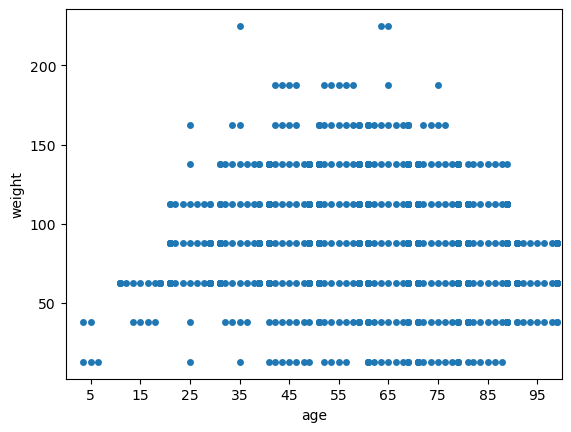

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

data_w = data[data['weight'].notna()]

sns.swarmplot(y='weight', x='age', data=data_w)